In [1]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,  TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.lancaster import LancasterStemmer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from pandas import Series
import networkx as nx
from PIL import Image
import seaborn as sns
import datetime as dt
import nltk, string
import pandas as pd
import numpy as np
import nltk as nlp
import datetime
import warnings
import calendar
import sys
import os
import re
import pandas as pd

In [2]:
biden_data=pd.read_csv(r"C:\Users\aslam\Downloads\602_project\biden_tweets.csv")
biden_data['handle']=np.nan
biden_data['handle'].fillna(value='JoeBiden',inplace=True)
biden_data.head()

,id,created_at,text,retweet_count,favorite_count,handle
0,1316189479544279041,2020-10-14 01:30:00,"Thank you, Florida! https://t.co/liQYRmvY7J",8556,67603,JoeBiden
1,1316178155510652929,2020-10-14 00:45:00,I’ll be a president for all Americans. Not jus...,17627,151476,JoeBiden
2,1316163055760232449,2020-10-13 23:45:00,"Folks, it’s hard to believe, but tomorrow nigh...",2077,7397,JoeBiden
3,1316155757511966721,2020-10-13 23:16:00,Here's something that will be very different i...,11944,72533,JoeBiden
4,1316147956689575936,2020-10-13 22:45:00,We all know President Trump has a tendency to ...,7897,23308,JoeBiden


In [3]:
x=biden_data['id']
type(x)

pandas.core.series.Series

In [4]:
biden_data.drop_duplicates(inplace=True)
biden_data.dropna(inplace=True)
biden_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3077 entries, 0 to 3076
Data columns (total 6 columns):
id                3077 non-null int64
created_at        3077 non-null object
text              3077 non-null object
retweet_count     3077 non-null int64
favorite_count    3077 non-null int64
handle            3077 non-null object
dtypes: int64(3), object(3)
memory usage: 168.3+ KB


In [5]:
biden_data.drop(biden_data.index[1058:3078],0,inplace=True)
biden_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1057
Data columns (total 6 columns):
id                1058 non-null int64
created_at        1058 non-null object
text              1058 non-null object
retweet_count     1058 non-null int64
favorite_count    1058 non-null int64
handle            1058 non-null object
dtypes: int64(3), object(3)
memory usage: 57.9+ KB


In [6]:
trump_data=pd.read_csv(r"C:\Users\aslam\Downloads\602_project\trump_tweets.csv")
trump_data['handle']=np.nan
trump_data['handle'].fillna(value='realDonaldTrump',inplace=True)
trump_data.head()

,id,created_at,text,retweet_count,favorite_count,handle
0,1316221805133279232,2020-10-14 03:38:27,https://t.co/75J7mUX0Iy,1155,3110,realDonaldTrump
1,1316214253527986178,2020-10-14 03:08:26,I will never let you down! #MAGA https://t.co/...,6712,27177,realDonaldTrump
2,1316194625405751296,2020-10-14 01:50:27,https://t.co/wJN4zv0y8O,46280,207008,realDonaldTrump
3,1316188335862247424,2020-10-14 01:25:27,For years you had a President who apologized f...,13196,49412,realDonaldTrump
4,1316187932961587200,2020-10-14 01:23:51,Proud citizens like you helped build this Coun...,9567,35601,realDonaldTrump


In [7]:
trump_data.drop_duplicates(inplace=True)
trump_data.dropna(inplace=True)
trump_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1057
Data columns (total 6 columns):
id                1058 non-null int64
created_at        1058 non-null object
text              1058 non-null object
retweet_count     1058 non-null int64
favorite_count    1058 non-null int64
handle            1058 non-null object
dtypes: int64(3), object(3)
memory usage: 57.9+ KB


In [8]:
trump_data['time_decoded'] = pd.to_datetime(trump_data.created_at)
trump_data['time_decoded'] = trump_data.time_decoded.map(lambda x: x.strftime('%Y-%m-%d'))
trump_data[['created_at', 'time_decoded']].head()

,created_at,time_decoded
0,2020-10-14 03:38:27,2020-10-14
1,2020-10-14 03:08:26,2020-10-14
2,2020-10-14 01:50:27,2020-10-14
3,2020-10-14 01:25:27,2020-10-14
4,2020-10-14 01:23:51,2020-10-14


In [9]:
biden_data['time_decoded'] = pd.to_datetime(biden_data.created_at)
biden_data['time_decoded'] = biden_data.time_decoded.map(lambda x: x.strftime('%Y-%m-%d'))
biden_data[['created_at', 'time_decoded']].head()

,created_at,time_decoded
0,2020-10-14 01:30:00,2020-10-14
1,2020-10-14 00:45:00,2020-10-14
2,2020-10-13 23:45:00,2020-10-13
3,2020-10-13 23:16:00,2020-10-13
4,2020-10-13 22:45:00,2020-10-13


In [10]:
data=pd.concat([biden_data,trump_data])
data.rename(columns={'created_at':'time'},inplace=True)
data.head()

,id,time,text,retweet_count,favorite_count,handle,time_decoded
0,1316189479544279041,2020-10-14 01:30:00,"Thank you, Florida! https://t.co/liQYRmvY7J",8556,67603,JoeBiden,2020-10-14
1,1316178155510652929,2020-10-14 00:45:00,I’ll be a president for all Americans. Not jus...,17627,151476,JoeBiden,2020-10-14
2,1316163055760232449,2020-10-13 23:45:00,"Folks, it’s hard to believe, but tomorrow nigh...",2077,7397,JoeBiden,2020-10-13
3,1316155757511966721,2020-10-13 23:16:00,Here's something that will be very different i...,11944,72533,JoeBiden,2020-10-13
4,1316147956689575936,2020-10-13 22:45:00,We all know President Trump has a tendency to ...,7897,23308,JoeBiden,2020-10-13


JoeBiden           1058
realDonaldTrump    1058
Name: handle, dtype: int64


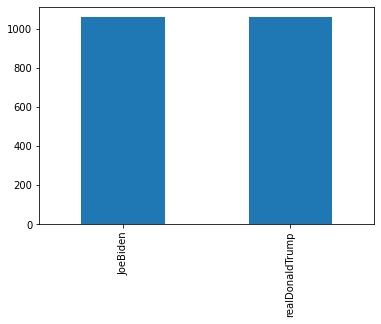

In [11]:

# Let's check if the data is balanced
print(data.handle.value_counts())
data.handle.value_counts().plot(kind='bar')


In [12]:
data['count']=1
grouped = data.groupby(['time_decoded', 'handle'])
grouped = grouped['count'].sum().reset_index()
grouped.tail()

,time_decoded,handle,count
149,2020-10-12,realDonaldTrump,56
150,2020-10-13,JoeBiden,16
151,2020-10-13,realDonaldTrump,47
152,2020-10-14,JoeBiden,2
153,2020-10-14,realDonaldTrump,9


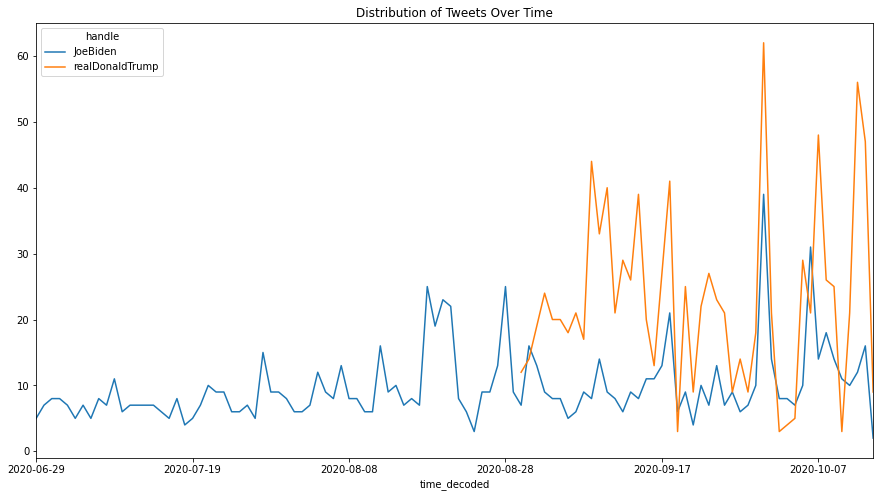

In [13]:
# Let's look at tweets over time
grouped.pivot(index='time_decoded', columns='handle', values='count').plot(figsize=(15, 8), title='Distribution of Tweets Over Time')

In [14]:
data['time'] = pd.to_datetime(data.time)
data['date']= data.time.apply(lambda x: x.date())
data['week']= data.time.apply(lambda x: x.isocalendar()[1])
data['tweet_hour'] = data.time.apply(lambda x: (x).hour)

# filter retweets and dates after 4/18/2016
data_ex_rt_daily = data.groupby(['date', 'handle']).size().unstack()
data_ex_rt_weekly = data.groupby(['week', 'handle']).size().unstack()

handle,JoeBiden,realDonaldTrump
count,108.000000,46.000000
mean,9.796296,23.000000
std,5.614999,13.790496
min,2.000000,3.000000
25%,7.000000,14.000000
50%,8.000000,21.000000
75%,11.000000,27.000000
max,39.000000,62.000000


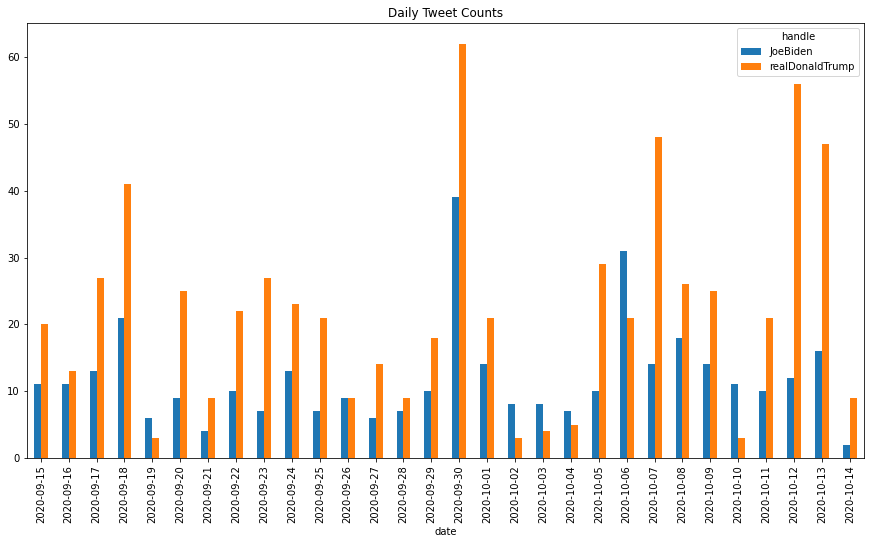

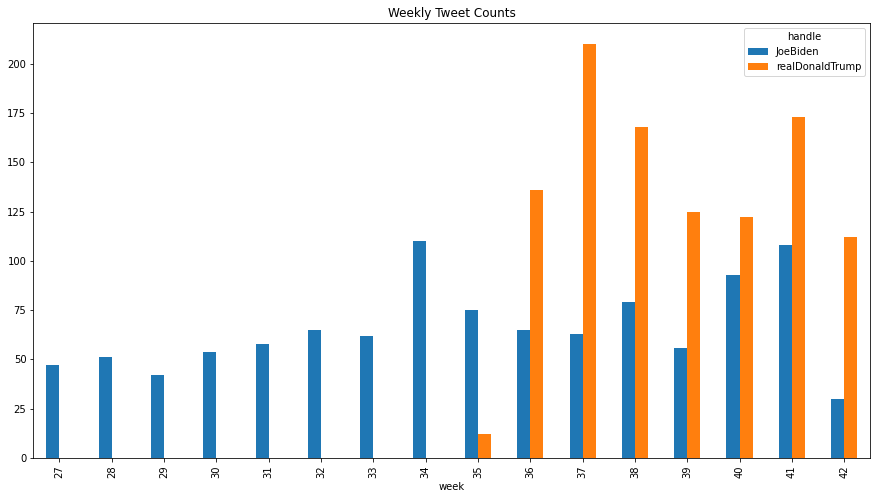

In [15]:
data_ex_rt_daily.tail(30).plot(kind='bar', title='Daily Tweet Counts', figsize=(15, 8) )
data_ex_rt_weekly.plot(kind='bar', title='Weekly Tweet Counts', figsize=(15, 8))

data_ex_rt_daily.describe()

#### Number of tweets by the months 

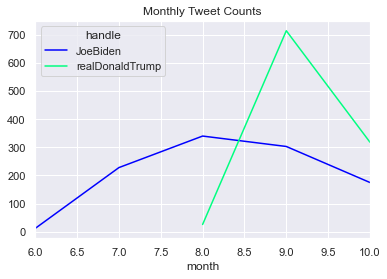

In [16]:
data['month'] = data['time'].apply(lambda x: x.month)
sns.set(font_scale=1)
monthly_tweets = data.groupby(['month', 'handle']).size().unstack()
monthly_tweets.plot(title='Monthly Tweet Counts', colormap='winter')

Biden has tweeted 1058 tweets in 4 months where as trump did it in just months

#### When do candidates tweet? 

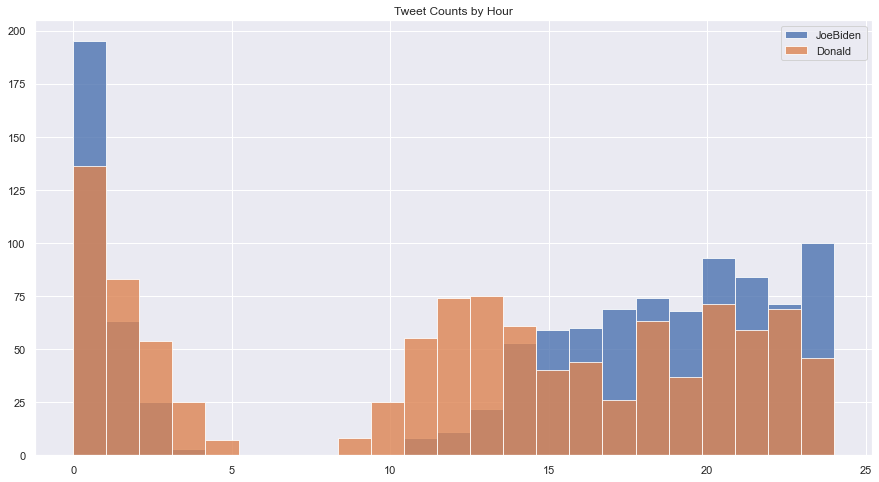

In [17]:
bins = np.linspace(0, 24, 24)
plt.figure(figsize=(15, 8))
plt.hist(data['tweet_hour'][data['handle']=='JoeBiden'], bins, alpha=0.8, label="JoeBiden")
plt.hist(data['tweet_hour'][data['handle']=='realDonaldTrump'], bins, alpha=0.8, label="Donald")
plt.legend()
plt.title('Tweet Counts by Hour')
plt.show()

#### Does time of tweet correlate with likes ? 

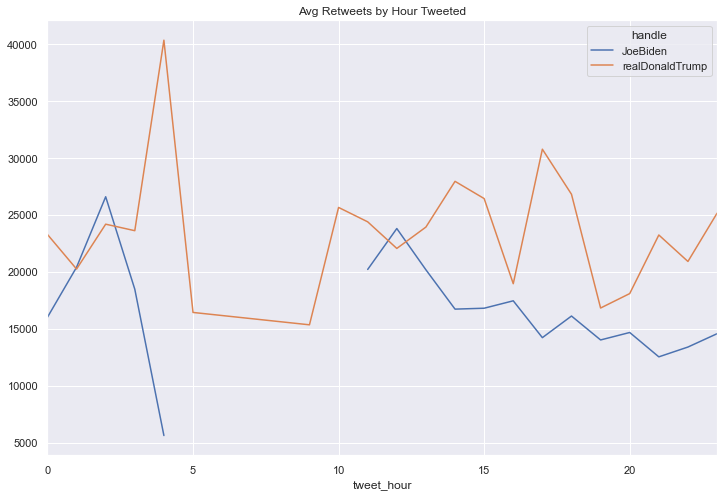

In [18]:
data_hour_retweets = data.groupby(['tweet_hour', 'handle']).apply(lambda x: np.mean(x.retweet_count)).unstack()
data_hour_retweets.plot(title='Avg Retweets by Hour Tweeted', figsize=(12, 8))

#### Does time of tweet correlate with likes ? 

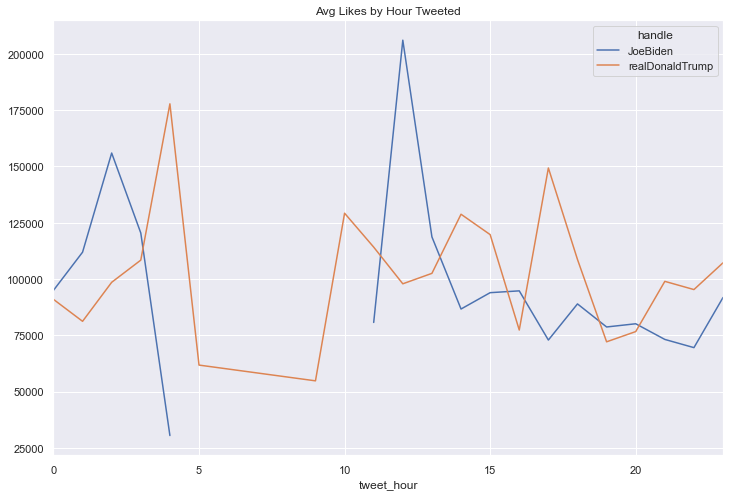

In [19]:
data_hour_likes = data.groupby(['tweet_hour', 'handle']).apply(lambda x: np.mean(x.favorite_count)).unstack()
data_hour_likes.plot(title='Avg Likes by Hour Tweeted', figsize=(12, 8))

In [20]:
trump_tweets = [' '.join(t.strip().split()) for t in trump_data.text.tolist()]
biden_tweets = [' '.join(t.strip().split()) for t in biden_data.text.tolist()]

In [21]:
stopwords = set(STOPWORDS)
stopwords.add("http")
stopwords.add("https")
stopwords.add("amp")
stopwords.add("CO")
stopwords.add("will")
stopwords.add("say")
stopwords.add("said")
stopwords.add("let")
stopwords.add("now")
stopwords.add("go")

#### Word Cloud :
Joe Biden's Word Cloud : 

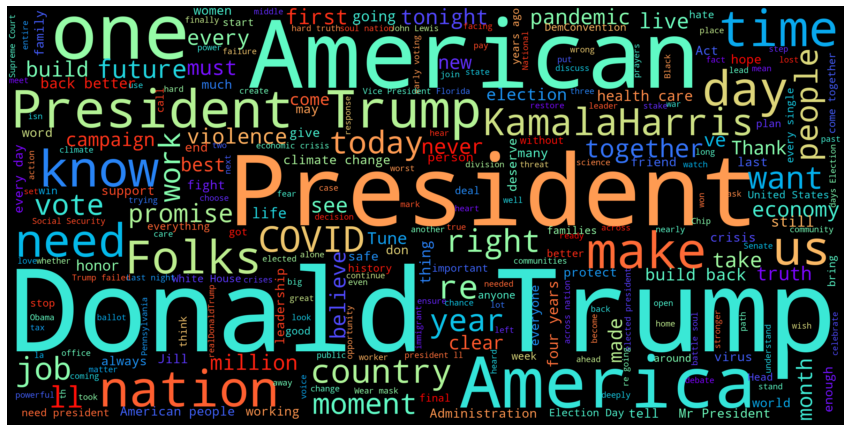

In [22]:
wordcloud_hc = WordCloud(max_font_size=100, max_words=1000, scale=6, relative_scaling=.6,stopwords=stopwords, background_color="black", colormap = "rainbow").generate(str(biden_tweets))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_hc,interpolation="bilinear")
plt.axis("off")
plt.show()

Donald Trump's Word Cloud :

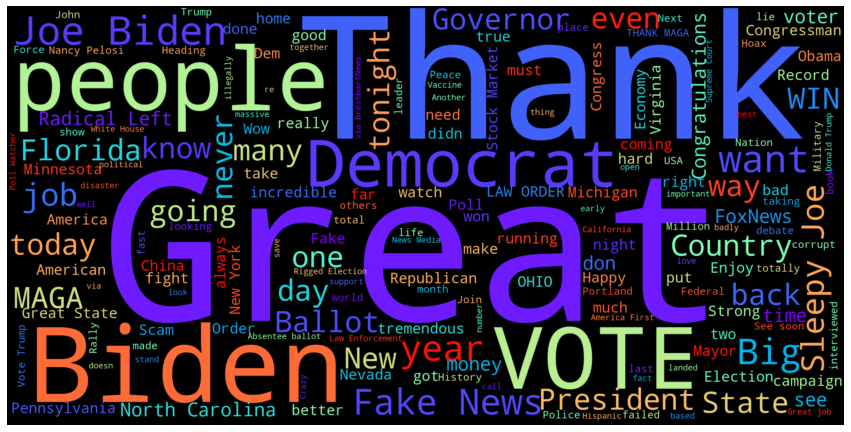

In [23]:
wordcloud_hc = WordCloud(max_font_size=100, max_words=1000, scale=6, relative_scaling=.6,stopwords=stopwords, background_color="black", colormap = "rainbow").generate(str(trump_tweets))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_hc,interpolation="bilinear")
plt.axis("off")
plt.show()

#### Mentions :
Extract mentions from tweets 

In [24]:
import re
def get_mentions(txt):
    mention = re.findall('(\@[A-Za-z_]+)', txt)
    if mention:
        return mention
    else:
        return ""     

In [25]:
mention_list_trump = []
trump_data['top_mentions'] = trump_data['text'].apply(lambda x: get_mentions(x))
for n in range(len(trump_data['top_mentions'])):
    mention_list_trump += trump_data['top_mentions'][n]

In [26]:
mention_list_biden = []
biden_data['top_mentions'] = biden_data['text'].apply(lambda x: get_mentions(x))
for i in range(len(biden_data['top_mentions'])):
    mention_list_biden += biden_data['top_mentions'][i]

Text(0.5, 1.0, "Trump's 6 most used mentions")

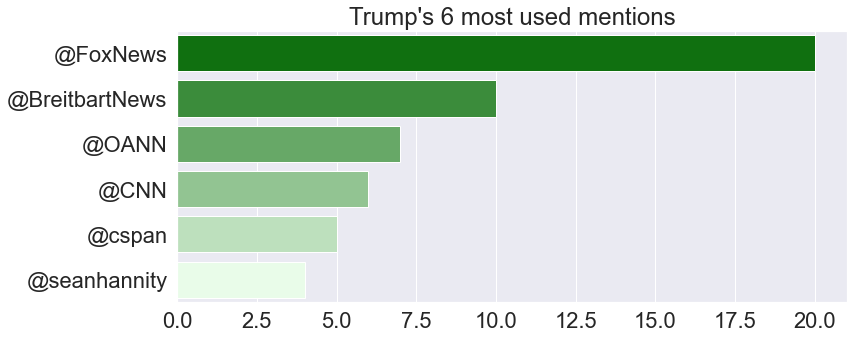

In [27]:
data1 = Series(mention_list_trump).value_counts().head(n=6)
sns.set_style("white")
sns.set(font_scale=2)
plt.figure(figsize=(12, 5))
sns.barplot(x=data1, y=data1.index, orient='h', palette=sns.light_palette("green",reverse=True)).set_title("Trump's 6 most used mentions")

Text(0.5, 1.0, "Biden's 6 most used mentions")

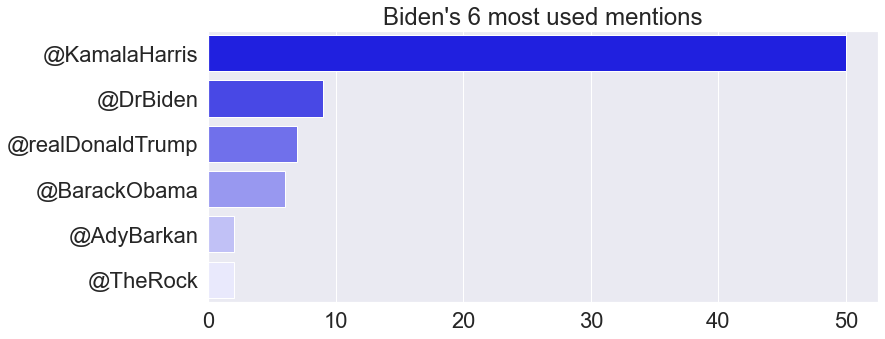

In [28]:
data2 = Series(mention_list_biden).value_counts().head(n=6)
sns.set_style("white")
sns.set(font_scale=2)
plt.figure(figsize=(12, 5))
sns.barplot(x=data2, y=data2.index, orient='h', palette=sns.light_palette("Blue",reverse=True)).set_title("Biden's 6 most used mentions")

In [29]:
def get_hashtags(txt):
    hashtag = re.findall('(\#[A-Za-z_]+)', txt)
    if hashtag:
        return hashtag
    else:
        return ""

In [30]:
hashtag_list_trump = []
trump_data['top_hashtags'] = trump_data['text'].apply(lambda x: get_hashtags(x))
for n in range(len(trump_data['top_hashtags'])):
    hashtag_list_trump += trump_data['top_hashtags'][n]

In [31]:
hashtag_list_biden = []
biden_data['top_hashtags'] = biden_data['text'].apply(lambda x: get_hashtags(x))
for i in range(len(biden_data['top_hashtags'])):
    hashtag_list_biden += biden_data['top_hashtags'][i]

C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1627: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


Text(0.5, 1.0, 'Popular hashtags used by Trump')

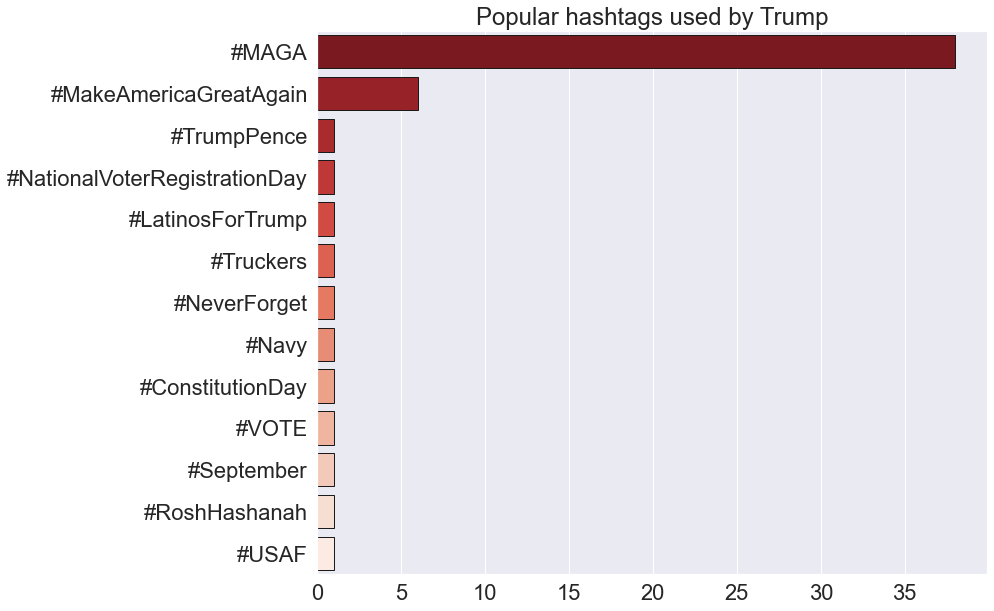

In [32]:
data4 = Series(hashtag_list_trump).value_counts().head(n=15)
sns.set_style("white")
sns.set(font_scale=2)
plt.figure(figsize=(12,10))
sns.barplot(x=data4, y=data4.index, orient='h', palette="Reds_r",linewidth = 1 , edgecolor = "k"* 25).set_title("Popular hashtags used by Trump")

Text(0.5, 1.0, 'Popular hashtags used by Biden')

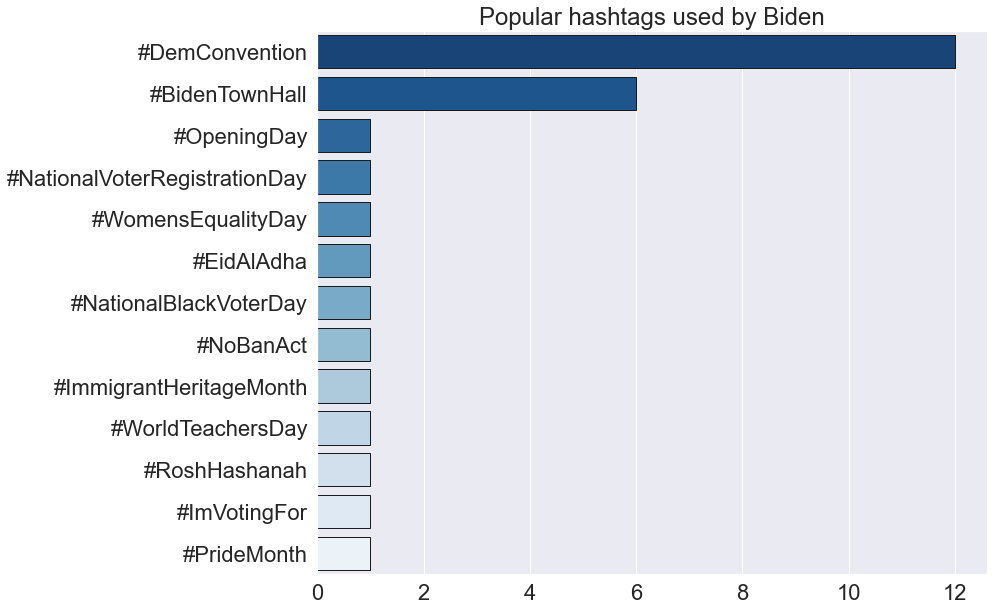

In [33]:
data5 = Series(hashtag_list_biden).value_counts().head(n=15)
sns.set_style("white")
sns.set(font_scale=2)
plt.figure(figsize=(12,10))
sns.barplot(x=data5, y=data5.index, orient='h', palette="Blues_r",linewidth = 1 , edgecolor = "k"* 25).set_title("Popular hashtags used by Biden")

In [34]:
B=nx.Graph() #create an empty graph

data6 = Series(hashtag_list_trump).value_counts().head(n=40)
data7 = Series(hashtag_list_biden).value_counts().head(n=40)

for hashtag1 in data6.index: #for each user loop over the hashtags they use
    B.add_edge('D.Trump',hashtag1) #add the edge Candidate<->hashtag
    
for hashtag2 in data7.index: #for each user loop over the hashtags they use
    B.add_edge('J.Biden',hashtag2) #add the edge Candidate<->hashtag

In [35]:
B.number_of_nodes()

26

In [36]:
B.number_of_edges()

26

C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


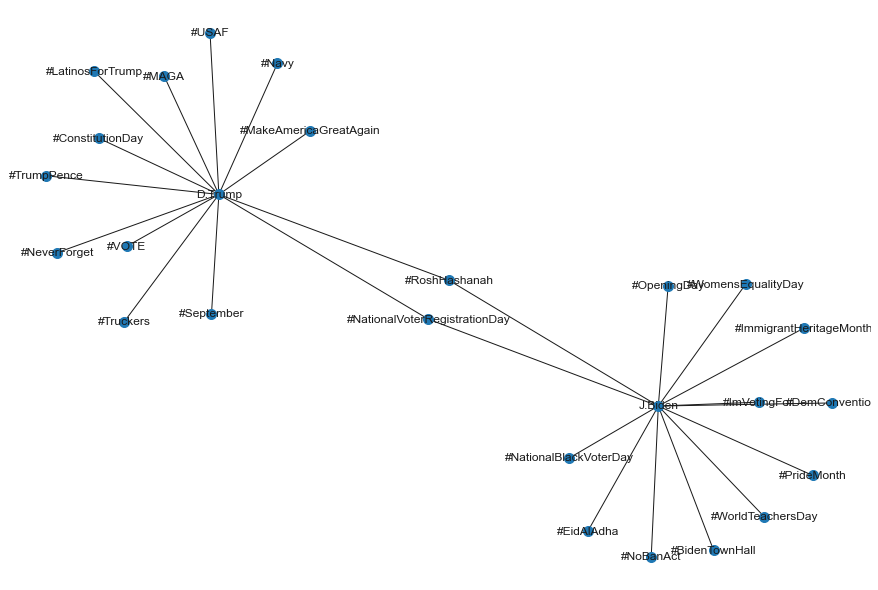

In [37]:
plt.figure(figsize=(12,8))
nx.draw_spring(B, with_labels=True, node_size= 100, font_size=12)
plt.show()

In [38]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from collections import Mapping
bloblist_desc = []

df_tweet_descr_str=data['text'].astype(str)
for row in df_tweet_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
d=df_tweet_polarity_desc['sentiment'] 
def f(d):
    if d > 0:
        val = "Positive"
    elif d == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val


C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  after removing the cwd from sys.path.


In [39]:
polarity=[]
for value in d:
    polarity.append(f(value))

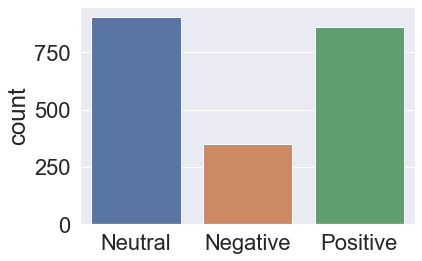

In [40]:
import seaborn as sns
ax = sns.countplot(x=polarity, data=df_tweet_polarity_desc)

In [41]:
tweet_biden = data.loc[(data['handle']=='JoeBiden'), ['text']]
bloblist_desc = list()

df_tweet_biden_str=tweet_biden['text'].astype(str)
for row in df_tweet_biden_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_biden_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

    
def f(df_tweet_biden_polarity_desc):
    if df_tweet_biden_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_biden_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_tweet_biden_polarity_desc['Sentiment_Type_Biden'] = df_tweet_biden_polarity_desc.apply(f, axis=1)

In [42]:
tweet_trump = data.loc[(data['handle']=='realDonaldTrump'), ['text']]
bloblist_desc = list()

df_tweet_trump_str=tweet_trump['text'].astype(str)
for row in df_tweet_trump_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_trump_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

    
def f(df_tweet_trump_polarity_desc):
    if df_tweet_trump_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_trump_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_tweet_trump_polarity_desc['Sentiment_Type_Trump'] = df_tweet_trump_polarity_desc.apply(f, axis=1)

C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


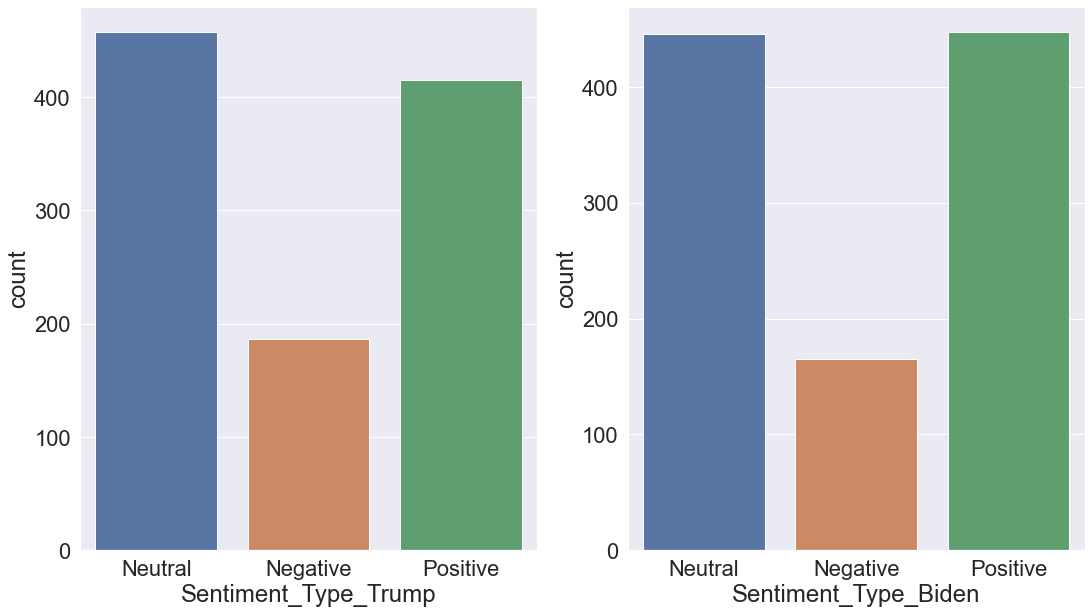

In [43]:
fig, ax =plt.subplots(1,2,figsize=(18,10))
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
sns.countplot(x="Sentiment_Type_Trump", data=df_tweet_trump_polarity_desc,  ax=ax[0])
sns.countplot(x="Sentiment_Type_Biden", data=df_tweet_biden_polarity_desc, ax=ax[1])
fig.show()

In [44]:
import markovify as mk

tweets = data[['handle', 'text']]

def tweet(tweeter):
    doc = tweets[tweets.handle.str.contains(tweeter)].text.tolist()
    text_model = mk.Text(doc) 
    print('\n', tweeter)
    for i in range(8):
        print(text_model.make_sentence(tries=100))
        
tweet('Biden')
tweet('Donald')


 Biden
I made some comments about diversity in the country, @KamalaHarris took on the passing of Justice Ruth Bader Ginsburg and the existential threat of climate change poses an existenti… https://t.co/fAHm6sME1n
We have to meet it together as a nation true to our highest ideals… https://t.co/L9Y5w9AkyY
To everyone celebrating the Hindu festival of Ganesh Chaturthi in the path of becoming angrier, less hopeful, and more economic pain and anxiety fo… https://t.co/zDYW2IWnwJ
Tune in as I deliver remarks on the ballot, and your voice — and we need a president who will choose science over fiction.
.@AndrewCuomo, thank you for all of us to get complacent.
We have to worry about my friend and running mate, @KamalaHarris. https://t.co/FYPXV5dZZG
The fact is, Donald Trump wants to ask her to be based on the disparities that have plagued our c… https://t.co/qLG7QT9lgF
But I will re… https://t.co/qNgyOKHOlE

 Donald
Heading to the Prime Minister @BorisJohnson of the WORST governors in the USA.

In [67]:
def subj_tweet(tweeter, subject):
    doc = tweets[tweets.handle.str.contains(tweeter)].text.tolist()
    text_model = mk.Text(doc) 
    print('\n', tweeter)
    for i in range(8):
        print(text_model.make_sentence_with_start(subject, strict=False))

subj_tweet('Biden', 'Trump')
subj_tweet('Donald', 'Biden')


 Biden
Trump knew how deadly COVID-19 was and did nothing — or the conviction o… https://t.co/PKdJlyJPP4
Trump administration another four years in the land of the Build Back Better Express Tour… https://t.co/2OPnM0YPLl
Trump put our nation unprepared and unprotected for the first confirmed case of COVID-19 in the back by police.
Trump and First Lady Melania Trump for the little guy, and one… https://t.co/gnzCegPMfl
Trump put our nation on the best partner I could have acted months ago to curb this pandemic—it's obvious he still hasn’t le… https://t.co/Po0ghaQkyi
Trump says tonight you won’t be safe in Joe Biden’s America, look around and ask him to do this: Listen to the way things were before these crises — we have to happen this way. https://t.co/27TL7PAhCi
Trump ignored the experts and leaders from… https://t.co/p8cLnYApjE
Trump Administration is in crisis.

 Donald
Biden wants to take advantage of the Great State of Texas.
Biden Accountable for his 47 years giving their jobs to C

In [46]:
#Create new dataframe for prediction model with candidate name (as label) and tweets (as message):
data['message'] = data['text'].apply(lambda x: x.lower().split('http')[0])
messages = data[['handle','message']]

In [47]:
print(messages[:5])

     handle                                            message
0  JoeBiden                               thank you, florida! 
1  JoeBiden  i’ll be a president for all americans. not jus...
2  JoeBiden  folks, it’s hard to believe, but tomorrow nigh...
3  JoeBiden  here's something that will be very different i...
4  JoeBiden  we all know president trump has a tendency to ...


In [48]:
def split_into_tokens(message):
    message = message  # convert bytes into proper unicode
    return TextBlob(message).words

In [49]:
messages.message.head()

0                                 thank you, florida! 
1    i’ll be a president for all americans. not jus...
2    folks, it’s hard to believe, but tomorrow nigh...
3    here's something that will be very different i...
4    we all know president trump has a tendency to ...
Name: message, dtype: object

In [50]:
messages.message.head().apply(split_into_tokens)

0                                [thank, you, florida]
1    [i, ’, ll, be, a, president, for, all, america...
2    [folks, it, ’, s, hard, to, believe, but, tomo...
3    [here, 's, something, that, will, be, very, di...
4    [we, all, know, president, trump, has, a, tend...
Name: message, dtype: object

In [51]:
import nltk
nltk.download('wordnet')
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

messages.message.head().apply(split_into_lemmas)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aslam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                [thank, you, florida]
1    [i, ’, ll, be, a, president, for, all, america...
2    [folk, it, ’, s, hard, to, believe, but, tomor...
3    [here, 's, something, that, will, be, very, di...
4    [we, all, know, president, trump, ha, a, tende...
Name: message, dtype: object

In [52]:
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(messages['message'])
print(len(bow_transformer.vocabulary_))
print(bow_transformer.get_feature_names()[:10])

4551
["'d", "'em", "'ll", "'m", "'re", "'s", "'ve", '0.57', '1', '1,000']


In [53]:
messages_bow = bow_transformer.transform(messages['message'])
print('sparse matrix shape:', messages_bow.shape)
print('number of non-zeros:', messages_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

sparse matrix shape: (2116, 4551)
number of non-zeros: 31663
sparsity: 0.33%


In [54]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['the']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['help']])

1.7600503280062296
5.1920193683351386


In [55]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)
messages_tfidf

(2116, 4551)


<2116x4551 sparse matrix of type '<class 'numpy.float64'>'
	with 31663 stored elements in Compressed Sparse Row format>

In [56]:
spam_detector = MultinomialNB().fit(messages_tfidf, messages['handle'])
all_predictions = spam_detector.predict(messages_tfidf)
tr_acc = accuracy_score(messages['handle'], all_predictions)
print("Accuracy on training set:  %.2f%%" % (100 * tr_acc))

Accuracy on training set:  88.75%


In [57]:
con_nai=confusion_matrix(messages['handle'], all_predictions)

print("Confusion Matrix \n ",con_nai)

Confusion Matrix 
  [[1050    8]
 [ 230  828]]


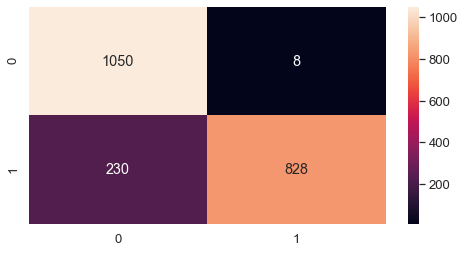

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,4))

sns.heatmap((con_nai), annot=True,fmt='d')
plt.show()

In [60]:
msg_train, msg_test, label_train, label_test = \
    train_test_split(messages['message'], messages['handle'], test_size=0.2, random_state=1)
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

1692 424 2116


In [61]:
from sklearn.model_selection import cross_val_score
pipeline = Pipeline([('bow', CountVectorizer(analyzer=split_into_lemmas)),('tfidf', TfidfTransformer()),('classifier', MultinomialNB())])

In [62]:
# steps to convert raw messages into models
# training data
# split data randomly into 10 parts: 9 for training, 1 for scoring
# which scoring metric?
# -1 = use all cores "faster"
scores = cross_val_score(pipeline,msg_train,label_train,cv=10,scoring='accuracy',n_jobs=-1)
print(scores, '\n')
print('Mean score:', scores.mean())
print('Stdev:', scores.std())

[0.9        0.90588235 0.89411765 0.89940828 0.8816568  0.88757396
 0.87573964 0.89940828 0.90532544 0.89285714] 

Mean score: 0.8941969568892645
Stdev: 0.009444448481210475


In [63]:
%time nb_detector = pipeline.fit(msg_train, label_train)
predictions = nb_detector.predict(msg_test)

Wall time: 994 ms


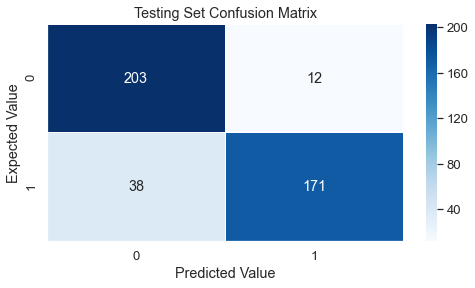

In [64]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(confusion_matrix(label_test, predictions), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Testing Set Confusion Matrix')
sns.despine(ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [65]:
my_1st_tweet = 'MAKE AMERICA GREAT AGAIN. VOTE!!!'
my_2nd_tweet = 'Now more than ever, we need a president who will choose compassion over cruelty.'
print("Tweet #1:", "'",my_1st_tweet, "'", ' \n \n', "I'm about %.0f%%" % (100 * max(nb_detector.predict_proba([my_1st_tweet])[0])), "sure this was tweeted by", nb_detector.predict([my_1st_tweet])[0])
print("Tweet #2:", "'",my_2nd_tweet, "'", ' \n \n', "I'm about %.0f%%" % (100 * max(nb_detector.predict_proba([my_2nd_tweet])[0])), "sure this was tweeted by", nb_detector.predict([my_2nd_tweet])[0])

Tweet #1: ' MAKE AMERICA GREAT AGAIN. VOTE!!! '  
 
 I'm about 69% sure this was tweeted by realDonaldTrump
Tweet #2: ' Now more than ever, we need a president who will choose compassion over cruelty. '  
 
 I'm about 86% sure this was tweeted by JoeBiden


In [66]:
your_tweet = 'This election is about so much more than policy. The character of our country is on the ballot.'

# ---- this part stays the same----
if your_tweet == 'ENTER YOUR TWEET HERE, INSIDE THE QUOTES':
    pass
else:
    print("Tweet #1:", "'",your_tweet, "'", ' \n \n', "I'm about %.0f%%" % (100 * max(nb_detector.predict_proba([your_tweet])[0])), "sure this was tweeted by", nb_detector.predict([your_tweet])[0])

Tweet #1: ' This election is about so much more than policy. The character of our country is on the ballot. '  
 
 I'm about 73% sure this was tweeted by JoeBiden


In [ ]:
we can use a Markov Chain Model to create synthetic tweets based on an existing library of actual tweets. Right now, its main use is for building Markov models of large corpora of text and generating random sentences from that.